In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Загрузка данных
data = pd.read_csv('car_price_prediction.csv')

In [3]:
# Изучение данных
print(data.head())  # Просмотр первых нескольких строк данных
print(data.info())  # Общая информация о данных

         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1   

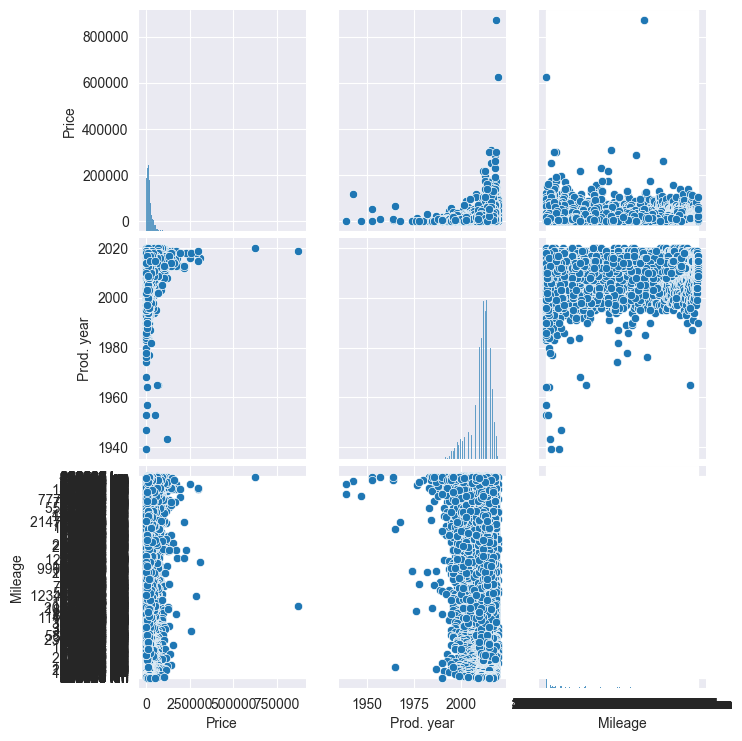

In [4]:
# Визуализация данных (выбор только некоторых числовых признаков)
sns.pairplot(data=data, vars=['Price', 'Prod. year', 'Mileage'])
plt.show()


In [6]:
  # Подготовка данных
X = data.drop(columns=['Price', 'ID'])  # Исключаем целевую переменную и идентификатор автомобиля из признаков
y = data['Price']  # Определяем целевую переменную

In [7]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Определение числовых и категориальных признаков
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [9]:
# Построение трансформаторов для числовых и категориальных признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [10]:
# Объединение трансформаторов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [11]:
# Построение моделей
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

In [12]:
# Обучение и оценка моделей
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"Model: {name}")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

ValueError: could not convert string to float: '-'

In [ ]:
# Пример прогнозирования цены для новых данных
new_data = pd.DataFrame({
    'Levy': [1000],
    'Manufacturer': ['Toyota'],
    'Model': ['Corolla'],
    'Prod. year': [2018],
    'Category': ['Sedan'],
    'Leather interior': ['Yes'],
    'Fuel type': ['Petrol'],
    'Engine volume': [1.8],
    'Mileage': [50000],
    'Cylinders': [4],
    'Gear box type': ['Automatic'],
    'Drive wheels': ['Front'],
    'Doors': [4],
    'Wheel': ['Left wheel'],
    'Color': ['Black'],
    'Airbags': [6]
})

predicted_price = pipeline.predict(new_data)
print("Predicted Price:", predicted_price)